In [113]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

In [115]:
from imblearn.over_sampling import SMOTEN

In [116]:
#importing trainning DF
df_train = catalog.load("train")

[02/23/23 16:20:50] INFO     Loading data from 'train' (CSVDataSet)...                          ]8;id=236470;file:///opt/anaconda3/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=985399;file:///opt/anaconda3/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

In [61]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
#checking num values on each column
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
#visualizando quais feature melhor se correlacionam com a target feature (survived)
df_train.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

[02/22/23 17:38:03] WARNING  /opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib ]8;id=505531;file:///opt/anaconda3/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=834429;file:///opt/anaconda3/lib/python3.8/warnings.py#109\109]8;;\
                             /compat.py:13: DeprecationWarning: distutils Version classes are                      
                             deprecated. Use packaging.version instead.                                            
                               op(LooseVersion(mpl.__version__), LooseVersion(version))                            
                                                                                                                   

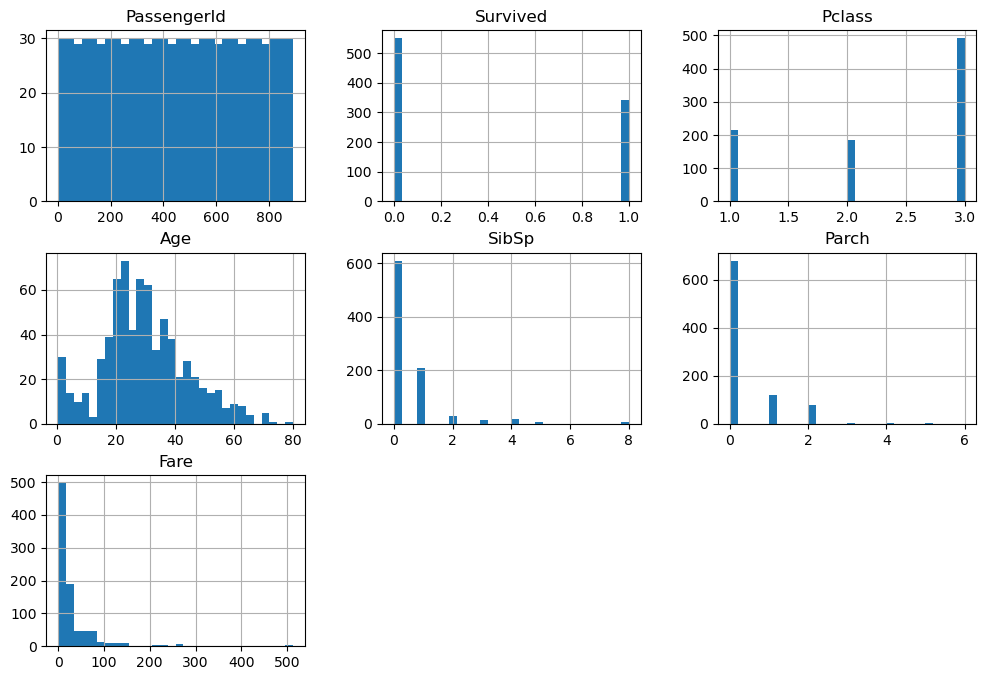

In [64]:
#histogram of numeric features
df_train.hist(bins=30, figsize=(12, 8))
plt.show()

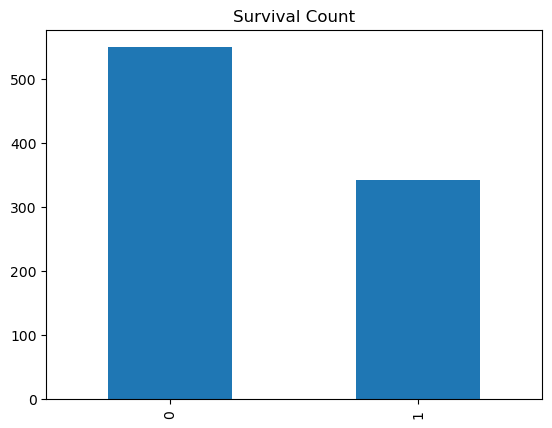

In [65]:
df_train.Survived.value_counts().plot(kind ='bar', title = 'Survival Count')
plt.show()

In [70]:
#dropping features with NAN values
df_dropped = df_train.drop(columns= ['Age', 'Cabin', 'Embarked'])
df_dropped.dropna()
df_dropped.isna().sum()

[02/22/23 17:44:36] WARNING  /opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287:  ]8;id=674809;file:///opt/anaconda3/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=555281;file:///opt/anaconda3/lib/python3.8/warnings.py#109\109]8;;\
                             DeprecationWarning: `should_run_async` will not call `transform_cell`                 
                             automatically in the future. Please pass the result to                                
                             `transformed_cell` argument and any exception that happen during                      
                             thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.                  
                               and should_run_async(code)                                                          
                                                                                                                   

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [101]:
#function to drop unecessary features
def drop_features (df: pd.DataFrame):
    df_dropped = df.drop(columns= ['Age', 'Cabin', 'Embarked'])
    return df_dropped
    

In [106]:
a = drop_features(df_train)
a

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


In [102]:
def encode (df: pd.DataFrame):
    ordinal_encoder = OrdinalEncoder()
    features = ['Name','Sex', 'Ticket']
    df[features]= ordinal_encoder.fit_transform(df[features]) 
    df_encoded = df
    return df_encoded    

In [107]:
aa = encode(a)
aa

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,108.0,1.0,1,0,523.0,7.2500
1,2,1,1,190.0,0.0,1,0,596.0,71.2833
2,3,1,3,353.0,0.0,0,0,669.0,7.9250
3,4,1,1,272.0,0.0,1,0,49.0,53.1000
4,5,0,3,15.0,1.0,0,0,472.0,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,0,0,101.0,13.0000
887,888,1,1,303.0,0.0,0,0,14.0,30.0000
888,889,0,3,413.0,0.0,1,2,675.0,23.4500
889,890,1,1,81.0,1.0,0,0,8.0,30.0000


In [73]:
ordinal_encoder = OrdinalEncoder()
features = ['Name','Sex', 'Ticket']
df_dropped[features]= ordinal_encoder.fit_transform(df_dropped[features]) 
df_encoded = df_dropped
df_encoded.describe()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,0.523008,0.381594,338.528620,32.204208
std,257.353842,0.486592,0.836071,257.353842,0.477990,1.102743,0.806057,200.850657,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,0.000000,0.000000,158.500000,7.910400
50%,446.000000,0.000000,3.000000,445.000000,1.000000,0.000000,0.000000,337.000000,14.454200
75%,668.500000,1.000000,3.000000,667.500000,1.000000,1.000000,0.000000,519.500000,31.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,8.000000,6.000000,680.000000,512.329200


In [109]:
def scale (df: pd.DataFrame):
    scaler = MinMaxScaler()
    dfe_NParray = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(dfe_NParray, columns=df.columns)
    return df_scaled

In [110]:
aaa = scale(aa)
aaa

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,0.000000,0.0,1.0,0.121348,1.0,0.125,0.000000,0.769118,0.014151
1,0.001124,1.0,0.0,0.213483,0.0,0.125,0.000000,0.876471,0.139136
2,0.002247,1.0,1.0,0.396629,0.0,0.000,0.000000,0.983824,0.015469
3,0.003371,1.0,0.0,0.305618,0.0,0.125,0.000000,0.072059,0.103644
4,0.004494,0.0,1.0,0.016854,1.0,0.000,0.000000,0.694118,0.015713
...,...,...,...,...,...,...,...,...,...
886,0.995506,0.0,0.5,0.615730,1.0,0.000,0.000000,0.148529,0.025374
887,0.996629,1.0,0.0,0.340449,0.0,0.000,0.000000,0.020588,0.058556
888,0.997753,0.0,1.0,0.464045,0.0,0.125,0.333333,0.992647,0.045771
889,0.998876,1.0,0.0,0.091011,1.0,0.000,0.000000,0.011765,0.058556


In [74]:
scaler = MinMaxScaler()
dfe_NParray = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(dfe_NParray, columns=df_encoded.columns)
df_scaled.describe()

[02/22/23 17:45:08] WARNING  /opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287:  ]8;id=977944;file:///opt/anaconda3/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=97059;file:///opt/anaconda3/lib/python3.8/warnings.py#109\109]8;;\
                             DeprecationWarning: `should_run_async` will not call `transform_cell`                 
                             automatically in the future. Please pass the result to                                
                             `transformed_cell` argument and any exception that happen during                      
                             thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.                  
                               and should_run_async(code)                                                          
                                                                                                                   

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.500000,0.383838,0.654321,0.500000,0.647587,0.065376,0.063599,0.497836,0.062858
std,0.289162,0.486592,0.418036,0.289162,0.477990,0.137843,0.134343,0.295369,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.500000,0.250000,0.000000,0.000000,0.000000,0.233088,0.015440
50%,0.500000,0.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.495588,0.028213
75%,0.750000,1.000000,1.000000,0.750000,1.000000,0.125000,0.000000,0.763971,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
def split_data (df: pd.DataFrame):
    train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
    y_train = train_set['Survived']
    X_train = train_set.drop(['Survived'], axis=1) 
    y_test = test_set['Survived']
    X_test = test_set.drop(['Survived'], axis=1)
    return y_train, X_train, y_test, X_test
    

In [ ]:
y_tr

In [75]:
train_set, test_set = train_test_split(df_scaled, test_size=0.2, random_state=42)

[02/22/23 17:45:19] WARNING  /opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287:  ]8;id=163461;file:///opt/anaconda3/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=134840;file:///opt/anaconda3/lib/python3.8/warnings.py#109\109]8;;\
                             DeprecationWarning: `should_run_async` will not call `transform_cell`                 
                             automatically in the future. Please pass the result to                                
                             `transformed_cell` argument and any exception that happen during                      
                             thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.                  
                               and should_run_async(code)                                                          
                                                                                                                   

In [76]:
y_train = train_set['Survived']
X_train = train_set.drop(['Survived'], axis=1) 
y_test = test_set['Survived']
X_test = test_set.drop(['Survived'], axis=1) 

In [117]:
tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)
print(classification_report(y_test, yPredTest))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       112
         1.0       0.97      0.96      0.96        67

    accuracy                           0.97       179
   macro avg       0.97      0.97      0.97       179
weighted avg       0.97      0.97      0.97       179



[02/22/23 17:59:18] WARNING  /opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287:  ]8;id=977231;file:///opt/anaconda3/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=445378;file:///opt/anaconda3/lib/python3.8/warnings.py#109\109]8;;\
                             DeprecationWarning: `should_run_async` will not call `transform_cell`                 
                             automatically in the future. Please pass the result to                                
                             `transformed_cell` argument and any exception that happen during                      
                             thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.                  
                               and should_run_async(code)                                                          
                                                                                                                   

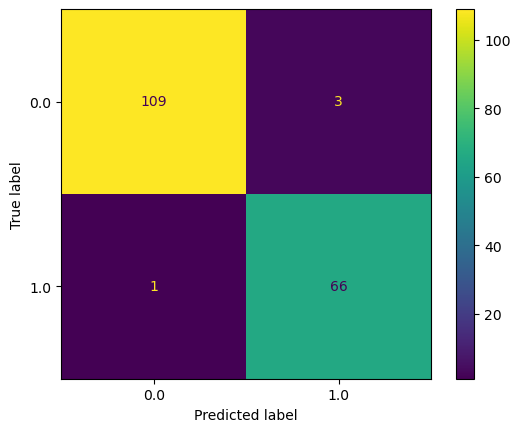

In [92]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [94]:
confusion_matrix(y_test, y_pred)

array([[109,   3],
       [  1,  66]])